# lab 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
data = pd.read_csv("trends-gss.csv")

In [3]:
#interested variable
sub = data[['year', 'age', 'sex', 'race','educ','happy', 'region', 'hrs1', 'realrinc', 'marital']]

#drop off na value
sub = sub.dropna()

In [4]:
# recodes
sub['yeshappy'] = np.where((sub['happy'] <= 2), 1, 0)
sub['yesmarried'] = np.where((sub['marital'] == 1), 1, 0)
sub['workhours'] = np.where((sub['hrs1'] <= 45), 1, 0)
sub['income'] = sub['realrinc']

### In this lab, i am interested in looking what will have an impact on people's happiness, especially i want to look at how one's  family income, marital status and working hours have an impact on their happiness. In this case, happy_pct is the dependent variable, it represents the % people who are saying happy. Independent variables include married_pct( the % people who have been married), work_pct (the % people who have been working no more than 45 hours), income, and year.

## 1. Create a multivariate time series; perform any interpolations.

In [5]:
by_year = sub.groupby('year', as_index = False).agg('mean').replace({0.000000: np.nan})
by_year

,year,age,sex,race,educ,happy,region,hrs1,realrinc,marital,yeshappy,yesmarried,workhours,income
0,1974,39.936747,1.387048,1.103916,12.680723,1.740964,4.459337,40.057229,24305.022590,1.814759,0.890060,0.734940,0.777108,24305.022590
1,1975,39.619858,1.425532,1.106383,12.329078,1.807092,4.506383,39.268085,20302.697872,1.907801,0.880851,0.702128,0.785816,20302.697872
2,1976,39.323398,1.388972,1.086438,12.748137,1.736215,4.467958,39.937407,22434.388972,1.950820,0.910581,0.679583,0.780924,22434.388972
3,1977,39.870647,1.441542,1.123134,12.463930,1.752488,4.707711,40.815920,23770.164179,1.998756,0.898010,0.662935,0.762438,23770.164179
4,1978,38.160668,1.437018,1.122108,12.812339,1.745501,4.583548,41.196658,21827.183805,2.068123,0.917738,0.652956,0.739075,21827.183805
5,1980,39.185135,1.432432,1.100000,12.879730,1.785135,4.864865,41.293243,24282.560811,2.151351,0.889189,0.618919,0.747297,24282.560811
6,1982,39.083243,1.492973,1.277838,12.875676,1.804324,4.587027,39.808649,18786.411892,2.269189,0.891892,0.572973,0.782703,18786.411892
7,1983,38.841191,1.471464,1.099256,13.121588,1.800248,4.668734,40.384615,19813.301489,2.130273,0.894541,0.629032,0.766749,19813.301489
8,1984,38.848371,1.513784,1.170426,13.204261,1.768170,4.838346,40.926065,19810.986216,2.230576,0.899749,0.580201,0.743108,19810.986216
9,1985,39.306295,1.453995,1.152542,13.244552,1.824455,4.897094,41.878935,22613.300242,2.175545,0.898305,0.606538,0.708232,22613.300242


In [6]:
by_year = by_year.sort_values('year')
by_year = by_year.set_index("year", drop = False)

# Interpolate missing values of time series linearly
by_year_ts = by_year.interpolate(method = 'linear')
by_year_ts

,year,age,sex,race,educ,happy,region,hrs1,realrinc,marital,yeshappy,yesmarried,workhours,income
year,,,,,,,,,,,,,,
1974,1974,39.936747,1.387048,1.103916,12.680723,1.740964,4.459337,40.057229,24305.022590,1.814759,0.890060,0.734940,0.777108,24305.022590
1975,1975,39.619858,1.425532,1.106383,12.329078,1.807092,4.506383,39.268085,20302.697872,1.907801,0.880851,0.702128,0.785816,20302.697872
1976,1976,39.323398,1.388972,1.086438,12.748137,1.736215,4.467958,39.937407,22434.388972,1.950820,0.910581,0.679583,0.780924,22434.388972
1977,1977,39.870647,1.441542,1.123134,12.463930,1.752488,4.707711,40.815920,23770.164179,1.998756,0.898010,0.662935,0.762438,23770.164179
1978,1978,38.160668,1.437018,1.122108,12.812339,1.745501,4.583548,41.196658,21827.183805,2.068123,0.917738,0.652956,0.739075,21827.183805
1980,1980,39.185135,1.432432,1.100000,12.879730,1.785135,4.864865,41.293243,24282.560811,2.151351,0.889189,0.618919,0.747297,24282.560811
1982,1982,39.083243,1.492973,1.277838,12.875676,1.804324,4.587027,39.808649,18786.411892,2.269189,0.891892,0.572973,0.782703,18786.411892
1983,1983,38.841191,1.471464,1.099256,13.121588,1.800248,4.668734,40.384615,19813.301489,2.130273,0.894541,0.629032,0.766749,19813.301489
1984,1984,38.848371,1.513784,1.170426,13.204261,1.768170,4.838346,40.926065,19810.986216,2.230576,0.899749,0.580201,0.743108,19810.986216


In [7]:
## dropping na values from 1972 and in essence, the whole row because it's values cannot be interpolated
by_year_ts=by_year_ts.dropna() 
by_year_ts

,year,age,sex,race,educ,happy,region,hrs1,realrinc,marital,yeshappy,yesmarried,workhours,income
year,,,,,,,,,,,,,,
1974,1974,39.936747,1.387048,1.103916,12.680723,1.740964,4.459337,40.057229,24305.022590,1.814759,0.890060,0.734940,0.777108,24305.022590
1975,1975,39.619858,1.425532,1.106383,12.329078,1.807092,4.506383,39.268085,20302.697872,1.907801,0.880851,0.702128,0.785816,20302.697872
1976,1976,39.323398,1.388972,1.086438,12.748137,1.736215,4.467958,39.937407,22434.388972,1.950820,0.910581,0.679583,0.780924,22434.388972
1977,1977,39.870647,1.441542,1.123134,12.463930,1.752488,4.707711,40.815920,23770.164179,1.998756,0.898010,0.662935,0.762438,23770.164179
1978,1978,38.160668,1.437018,1.122108,12.812339,1.745501,4.583548,41.196658,21827.183805,2.068123,0.917738,0.652956,0.739075,21827.183805
1980,1980,39.185135,1.432432,1.100000,12.879730,1.785135,4.864865,41.293243,24282.560811,2.151351,0.889189,0.618919,0.747297,24282.560811
1982,1982,39.083243,1.492973,1.277838,12.875676,1.804324,4.587027,39.808649,18786.411892,2.269189,0.891892,0.572973,0.782703,18786.411892
1983,1983,38.841191,1.471464,1.099256,13.121588,1.800248,4.668734,40.384615,19813.301489,2.130273,0.894541,0.629032,0.766749,19813.301489
1984,1984,38.848371,1.513784,1.170426,13.204261,1.768170,4.838346,40.926065,19810.986216,2.230576,0.899749,0.580201,0.743108,19810.986216


In [8]:
#convert to percentage terms 
by_year_ts['happy_pct'] = by_year_ts['yeshappy']*100
by_year_ts['married_pct'] = by_year_ts['yesmarried']*100
by_year_ts['work_pct'] = by_year_ts['workhours']*100

## 2. graph the relationships between x and y explain how you think y should relate to your key xs.

### from some preliminary analysis, I think these Xs variable will have a significant  impact on people's happiness. Like having over-time working job with over 45 hours per weeks would be recognized as a busy work, especially for the married group people as they have family and kids need to take care, so work_pct and married_pac could affect on happiness. Also, people who have lower income will strugging with living and it would more likly to impact their feeling on whether they are happy. That's why I choose these Xs to analyze what will affect people's happiness.

In [9]:
corr_vars = ['happy_pct', 'married_pct','work_pct','income', 'year']
by_year_ts[corr_vars].corr()

,happy_pct,married_pct,work_pct,income,year
happy_pct,1.000000,0.076950,-0.143844,-0.373893,-0.200007
married_pct,0.076950,1.000000,0.781667,-0.350273,-0.898411
work_pct,-0.143844,0.781667,1.000000,-0.395265,-0.792939
income,-0.373893,-0.350273,-0.395265,1.000000,0.600750
year,-0.200007,-0.898411,-0.792939,0.600750,1.000000


<Axes: >

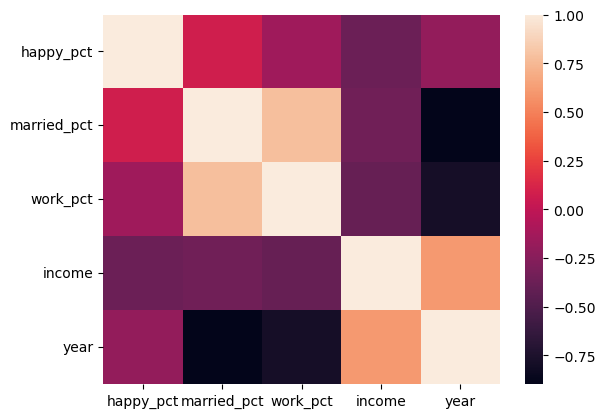

In [10]:
sns.heatmap(by_year_ts[corr_vars].corr())

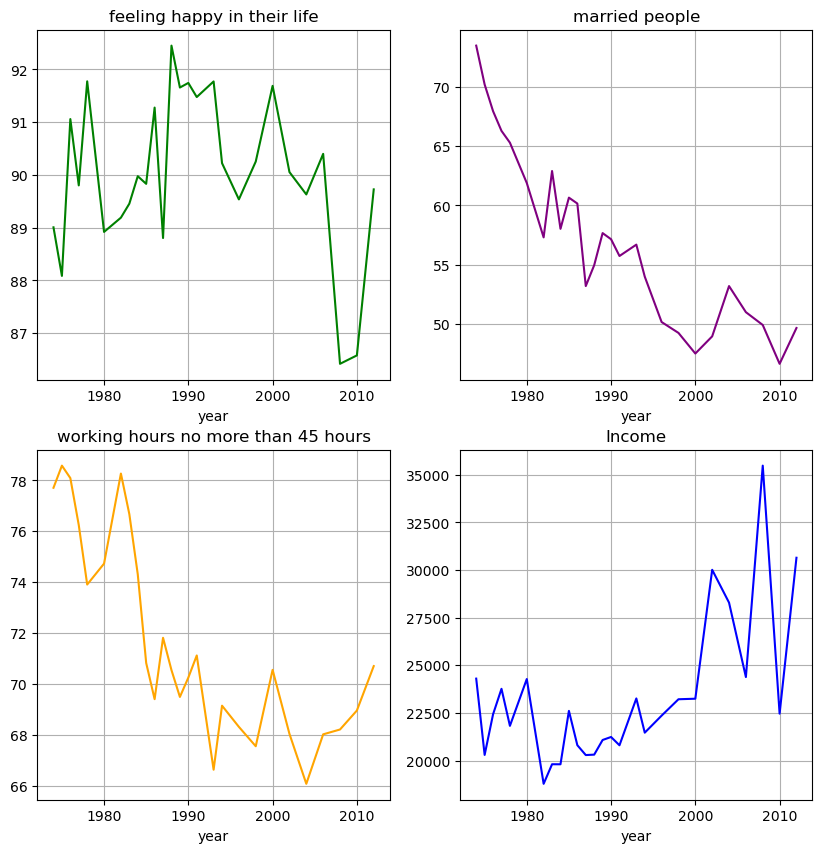

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

by_year_ts['happy_pct'].plot(title = 'feeling happy in their life', color = 'g', ax = axes[0,0], grid = True)
by_year_ts['married_pct'].plot(title = 'married people', color = 'purple', ax = axes[0,1], grid = True)
by_year_ts['work_pct'].plot(title = 'working hours no more than 45 hours', color = 'orange', ax = axes[1,0], grid = True)
by_year_ts['income'].plot(title = 'Income', color = 'b', ax = axes[1,1], grid = True)

plt.show()

### According to the above graphs, we can see a drop trend on percentage of people who work no more than 45 hours per week and on percentage of people who are married. It's understandable that there is the trend in young group to not in married and have a heavy work load in recent year. While it's not easy to see from the graph that the percent of people who feel happy is whether more or less positively associated with the percent of people who have no more 45 working hours and married. We can see that about 86% people will say they are happy ( including very happy and pretty happy) within the year passed, while there was a big drop around 2008, it assumed that it could because of the 2007–2008 Global Financial Crisis , was the most severe worldwide economic crisis since the Great Depression. The income has a big peak around 2007-2008, it could proven that the income disparity intensified because of financial crisis. So let's investiage more of how work hours and married status will affect on people's happiness. 

## 3. run a simple time series regression, with one x and no trend.interpret it.

In [12]:
lm_happy = smf.ols('happy_pct ~ work_pct', data = by_year_ts).fit()
lm_happy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happy_pct   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5282
Date:                Fri, 15 Dec 2023   Prob (F-statistic):              0.474
Time:                        02:29:10   Log-Likelihood:                -48.661
No. Observations:                  27   AIC:                             101.3
Df Residuals:                      25   BIC:                             103.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.0482      5.539     16.980      0.000      82.641     105.455
work_pct      -0.0561      0.077     -0.727      0.474      -0.215       0.103
==============================================================================
Omnibus:                        5.139   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.371
Skew:                          -0.792   Prob(JB):                        0.185
Kurtosis:                       3.700   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 in the table means about 2.1% of the variance in happy_pct is explained by work_pct. For a one point increase in the percent of people who have not working over 45 hours, there is on average a 0.056 point decrease in the percent of people feeling happy. However, the coefficient is not statistically significant at the 0.05 level, as the p-value is greater than 0.05. So this model is not good enough to explain the associated of happy_pct and work_pct.

## 4. run a time series regression with one x and trend interpret it. perform autocorrelation diagnostics. explain what you found.

In [13]:
lm_happy2 = smf.ols('happy_pct ~ work_pct + year', data = by_year_ts).fit()
lm_happy2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happy_pct   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     4.816
Date:                Fri, 15 Dec 2023   Prob (F-statistic):             0.0174
Time:                        02:29:15   Log-Likelihood:                -44.388
No. Observations:                  27   AIC:                             94.78
Df Residuals:                      24   BIC:                             98.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    338.2225     81.827      4.133      0.000     169.340     507.105
work_pct      -0.3178      0.110     -2.879      0.008      -0.546      -0.090
year          -0.1132      0.038     -2.989      0.006      -0.191      -0.035
==============================================================================
Omnibus:                        0.411   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.559
Skew:                          -0.166   Prob(JB):                        0.756
Kurtosis:                       2.378   Cond. No.                     6.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The good part is both work_pct and year are statistically significant predictors of happy_pct at the 0.05 significance level. The negative coefficients for both work_pct and year suggest that an increase in these variables is associated with a decrease in happy_pct. For a 1 point incease in people who are not working over 45 hours, on average that there is a 0.3178 point decrease in the percent of people feel happyiness. Aslo, it shows that every year, the percent of people feeling happy decreased by 0.1132 point. R^2 is a bit high at 0.286, compared with first model. It means that 28.6% of the variation in happy is explained by the independent variables of this model. While, The large condition number (6.38e+05) suggests potential multicollinearity or numerical problems. It's important to check for multicollinearity among the predictors. Therefore, we could consider more variables that might affect happy.

In [14]:
# Testing for Heteroscedasticity using Breuschgpagan Test

from statsmodels.compat import lzip
name = ['BP', 'p-value', 'f-value', 'f p-value']

test2 = sm.stats.diagnostic.het_breuschpagan(lm_happy2.resid, lm_happy2.model.exog)
lzip(name, test2)


[('BP', 7.621720013469824),
 ('p-value', 0.022129139562145624),
 ('f-value', 4.719750164886259),
 ('f p-value', 0.01868174966187526)]

### the p-value is significant at 0.02 which is less than 0.05. This proves that the null hypothesis is not true and that heteroscedasticity is present in this model. 

In [15]:
# Testing for Auto-correlation
from statsmodels.tsa.stattools import acf

err2 = lm_happy2.resid
acf(err2)

array([ 1.        , -0.06816698, -0.1049684 , -0.04428264, -0.18400777,
       -0.12208532,  0.22925878, -0.02434859,  0.15478145, -0.2076189 ,
       -0.03633324, -0.04506992, -0.16654361,  0.07635335,  0.07111925])

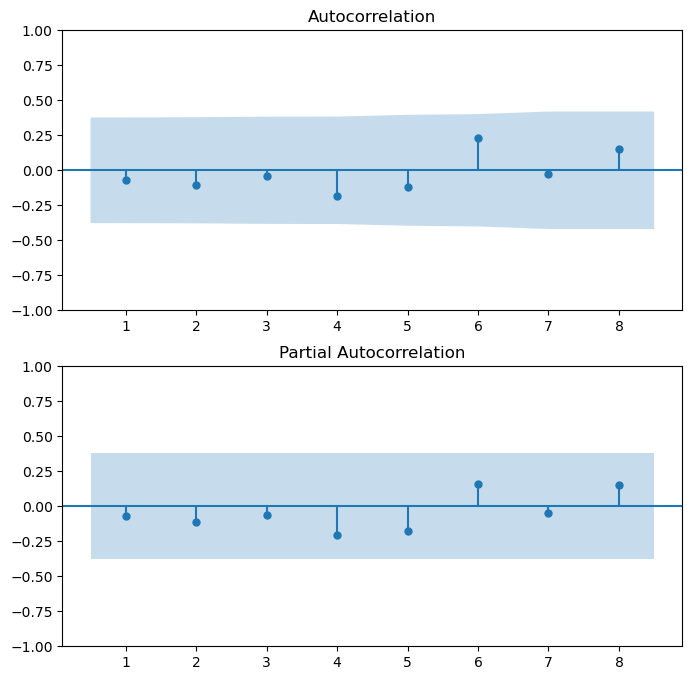

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(err2, lags = 8, zero = False, ax=ax[0]);
plot_pacf(err2, lags = 8, zero = False, ax=ax[1]);
plt.show()

In [17]:
# testing for autocorrelation using the breusch godfrey test

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

print('Durbin Watson statistic:', durbin_watson(err2)) #Not actualy using Durbin-Watson to determine results as it doesnt show p value.

lmtest2, pval2, fval2, f_pval2 = acorr_breusch_godfrey(lm_happy2, nlags = 1)
print('LM test =', lmtest2)
print('p-value =', pval2)

Durbin Watson statistic: 2.0358255973095316
LM test = 0.16823831640171527
p-value = 0.6816822408751934


### according to the above plot, the first value (1.0) represents the autocorrelation at lag 0, which is always 1 because it's the correlation of a variable with itself. The subsequent values represent the autocorrelation at increasing lags (lags 1, 2, 3, and so on). For example, the second value (-0.06816698) represents the autocorrelation at lag 1. Negative values suggest a negative autocorrelation, and the magnitude indicates the strength of the autocorrelation. Values closer to -1 or 1 indicate stronger autocorrelation. In this case, the autocorrelation values seem to fluctuate, and some are relatively close to zero.
### Durbin watson statistic has a value of 2.04 which is close to 2, indicating there is little to no autocorrelation. Aslo, it has a relatively high pvalue of 0.6817, suggesting that there is not enough evidence to reject the null hypothesis of no autocorrelation. Therefore, breusch godfrey test suggests that there is little to no evidence of autocorrelation in the residuals of your regression model.

## 5. consider running a time series regression with many xs and trend interpret that.check vif.

In [18]:
lm_happy3 = smf.ols('happy_pct ~ work_pct + married_pct + income + year', data = by_year_ts).fit()
lm_happy3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happy_pct   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     2.876
Date:                Fri, 15 Dec 2023   Prob (F-statistic):             0.0467
Time:                        02:29:28   Log-Likelihood:                -43.265
No. Observations:                  27   AIC:                             96.53
Df Residuals:                      22   BIC:                             103.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     264.0969    156.639      1.686      0.106     -60.752     588.946
work_pct       -0.2944      0.115     -2.570      0.017      -0.532      -0.057
married_pct     0.0101      0.100      0.102      0.920      -0.197       0.217
income         -0.0001      0.000     -1.229      0.232      -0.000    8.61e-05
year           -0.0757      0.076     -0.996      0.330      -0.233       0.082
==============================================================================
Omnibus:                        0.218   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.375
Skew:                          -0.172   Prob(JB):                        0.829
Kurtosis:                       2.536   Cond. No.                     1.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### in this table, it added the independent variables, married_pct and income.  R^2 is at 0.343, larger than model 2, that it means 34.3% of the variation in happy is explained by the independent variables of this model. It shown that adding more variables is improving model accuracy and prediction.
### For work_pct: a 1 point increase in the percent of people who are not working over than 45 hours, on average there is a 0.2944 point decrease in the percent of people who feel happy, at a statistically significant with a p value(0.017) is lower than 0.05. For a 1 point increase in the percent of people who are married, on average there is a 0.01 point increase in the percent of people who feel happy, at a statistically insignificant with a p value(0.92) is greater than 0.05. Also, for a 1 point increase in the percent of people's income,  on average there is a 0.0001 point decrease in the percent of people who feel happy, at a statistically insignificant with a p value(0.232) is lower than 0.05. Lastly, with every year, the percent of people who feel happy decrease by 0.0757 points, with a not statistcally significant p-value that greater than 0.05. 

In [19]:
# Checking for multicollinearity with VIF test
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('happy_pct ~ work_pct + married_pct + income + year',
                 data = by_year_ts, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIR Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.iloc[1:]

,VIR Factor,features
1,2.890306,work_pct
2,7.631892,married_pct
3,2.209889,income
4,10.802157,year


### In this tab, the higher VIR factor score indicated the features (independent variables) have a relatively larger impact on the model performance. There are more explaination: the feature work_pct has a VIR factor of approximately 2.89. This suggests that, according to the model, work_pct contributes moderately to the overall importance or performance of the model. The feature married_pct has a VIR factor of approximately 7.63. This suggests that, according to the model, married_pct is relatively more important or has a higher impact on the model compared to work_pct. The feature income has a VIR factor of approximately 2.21. This indicates a moderate contribution to the model's overall performance.  The feature year has the highest VIR factor of approximately 10.80. This suggests that, according to the model, year is the most important or influential feature. Therefore, years has the highest VIR factors in this case. 

## 6. run a first differenced time series regression. interpret that.

In [20]:
by_yearFD = pd.DataFrame()

by_yearFD = by_year_ts[['happy_pct', 'income', 'married_pct', 'work_pct']]
by_yearFD = by_yearFD.diff()

by_yearFD['year'] = by_year_ts['year']

In [21]:
lm_happy4 = smf.ols('happy_pct ~ work_pct + year', data = by_yearFD).fit()
lm_happy4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happy_pct   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                    0.1029
Date:                Fri, 15 Dec 2023   Prob (F-statistic):              0.903
Time:                        02:29:40   Log-Likelihood:                -51.500
No. Observations:                  26   AIC:                             109.0
Df Residuals:                      23   BIC:                             112.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3867     68.830      0.122      0.904    -133.999     150.772
work_pct      -0.0742      0.183     -0.405      0.689      -0.453       0.304
year          -0.0042      0.035     -0.122      0.904      -0.076       0.067
==============================================================================
Omnibus:                        0.224   Durbin-Watson:                   2.740
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.031
Skew:                           0.075   Prob(JB):                        0.984
Kurtosis:                       2.919   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 is very low in this model that has dropped down to 0.009 from 0.343. It means that 0.9% of the variation in happy is explained by the independent variable of this model. The reduction is because we took first differences and eliminated problems like bias.
### For a 1 point increase in the percent of people not working over 45 hours, on average there is a 0.074 decrease in difference of the percent of people who feel happy. It is not statistically significant with a pvalue of 0.689. Additionally, by looking at p-value, they are larger than 0.05 shown a statistically insignificant. It prove that running the first difference time series regression model is not good fit for this particular model. 

## 7. check your variables for unit roots. do some tests.interpret them

In [22]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [23]:
from arch import unitroot
from arch.unitroot import ADF, PhillipsPerron, DFGLS
by_year_ts

,year,age,sex,race,educ,happy,region,hrs1,realrinc,marital,yeshappy,yesmarried,workhours,income,happy_pct,married_pct,work_pct
year,,,,,,,,,,,,,,,,,
1974,1974,39.936747,1.387048,1.103916,12.680723,1.740964,4.459337,40.057229,24305.022590,1.814759,0.890060,0.734940,0.777108,24305.022590,89.006024,73.493976,77.710843
1975,1975,39.619858,1.425532,1.106383,12.329078,1.807092,4.506383,39.268085,20302.697872,1.907801,0.880851,0.702128,0.785816,20302.697872,88.085106,70.212766,78.581560
1976,1976,39.323398,1.388972,1.086438,12.748137,1.736215,4.467958,39.937407,22434.388972,1.950820,0.910581,0.679583,0.780924,22434.388972,91.058122,67.958271,78.092399
1977,1977,39.870647,1.441542,1.123134,12.463930,1.752488,4.707711,40.815920,23770.164179,1.998756,0.898010,0.662935,0.762438,23770.164179,89.800995,66.293532,76.243781
1978,1978,38.160668,1.437018,1.122108,12.812339,1.745501,4.583548,41.196658,21827.183805,2.068123,0.917738,0.652956,0.739075,21827.183805,91.773779,65.295630,73.907455
1980,1980,39.185135,1.432432,1.100000,12.879730,1.785135,4.864865,41.293243,24282.560811,2.151351,0.889189,0.618919,0.747297,24282.560811,88.918919,61.891892,74.729730
1982,1982,39.083243,1.492973,1.277838,12.875676,1.804324,4.587027,39.808649,18786.411892,2.269189,0.891892,0.572973,0.782703,18786.411892,89.189189,57.297297,78.270270
1983,1983,38.841191,1.471464,1.099256,13.121588,1.800248,4.668734,40.384615,19813.301489,2.130273,0.894541,0.629032,0.766749,19813.301489,89.454094,62.903226,76.674938
1984,1984,38.848371,1.513784,1.170426,13.204261,1.768170,4.838346,40.926065,19810.986216,2.230576,0.899749,0.580201,0.743108,19810.986216,89.974937,58.020050,74.310777


In [24]:
ADF(by_year_ts['happy_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

Test Statistic,-1.676
P-value,0.444
Lags,2


### according to the augmented dickey-fuller test, the result of p-value is 0.444 which is greater than 0.05 it means that there are unit roots present in the happy_pct time series process

In [25]:
DFGLS(by_year_ts['happy_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

Test Statistic,-1.661
P-value,0.095
Lags,2


### according to the Dickey-Fuller (GLS) test , the result of p-value is 0.095 which is greater than 0.05 it means that there are unit roots present in the happy_pct time series process

In [26]:
PhillipsPerron(by_year_ts['happy_pct'], lags = 3)

Test Statistic,-3.602
P-value,0.006
Lags,3


### according to the Phillips-Perro test , three lags used in this test. As a result, the p-value is 0.006 which is smaller than 0.05, so we could reject the null hypothesis and provide evidence againts that there are unit roots present in the happy_pct time series process, and suggesting the time series is weakly stationary. 

## 8. Perform an Automatic ARIMA on the residuals from one of your earlier models. Tell me what it says.

In [27]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [28]:
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")

auto_arima(err2, trace = True, test='kpss', information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=95.369, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=98.530, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=98.489, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=92.073, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.446 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### this part i conducted a stepwise search to find the ARIMA model that minimizes the Bayesian Information Criterion (BIC). The model suggested that the best model would be ARIMA (0,0,0)(0,0,0)[0] with intercept ( as it supposed to be included). it has a lowest BIC (95.369) among all the presented models. 

## 9. Run an ARIMA that follows from Step 8. Interpret that, too.

In [29]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

by_year_ts['intercept'] = 1 # use an intercept as indicated in the model
arima_happy = SARIMAX(endog = by_year_ts['happy_pct'], order = (0, 0, 0),
                      exog = by_year_ts[['work_pct', 'year', 'intercept']]).fit(trend = 'nc')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81045D+00    |proj g|=  4.67860D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1      4      1     0     0   3.766D-01   2.810D+00
  F =   2.8104546332762461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [30]:
arima_happy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              happy_pct   No. Observations:                   27
Model:                        SARIMAX   Log Likelihood                 -75.882
Date:                Fri, 15 Dec 2023   AIC                            159.765
Time:                        02:30:25   BIC                            164.948
Sample:                             0   HQIC                           161.306
                                 - 27                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
work_pct      -0.3178      3.627     -0.088      0.930      -7.428       6.792
year          -0.1132      0.910     -0.124      0.901      -1.896       1.670
intercept    338.2225   2034.223      0.166      0.868   -3648.781    4325.226
sigma2        42.3511     16.912      2.504      0.012       9.204      75.498
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.71   Prob(JB):                         0.76
Heteroskedasticity (H):               2.79   Skew:                            -0.17
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### BIC value is higher in this analysis at a value of 164.948, compared to Q8 BIC of 95.369, this could because we are running exogenous variable through the model. The work_pct and year coefficients are statistically insignificant, as pvalue is greater than 0.05, suggesting they have no impact on happy_pct.

In [31]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(arima_happy.resid, boxpierce = True, lags = round((len(by_year_ts)/2-2), 0))

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.139944,0.708337,0.125467,0.723179
2,0.485045,0.784646,0.422968,0.809382
3,0.549018,0.907998,0.475911,0.924151
4,1.701681,0.790412,1.390092,0.845915
5,2.232143,0.816180,1.792512,0.877045
6,4.191886,0.650727,3.211636,0.781854
7,4.215096,0.754696,3.227643,0.863175
8,5.202395,0.735741,3.874493,0.868266
9,7.077471,0.629054,5.038334,0.830954
10,7.138271,0.712330,5.073976,0.886182


### For each lag (1 to 12), the lb_pvalue is greater than 0.05, suggesting that there is insufficient evidence to reject the null hypothesis of no autocorrelation. This indicates that the residuals may not exhibit significant autocorrelation. Looking at bp_pvalue, each value is greater than 0.05, suggesting that there is insufficient evidence to reject the null hypothesis of no heteroskedasticity. This indicates that the residuals may not exhibit significant heteroskedasticity. Therefore, both p-value greater than 0.05, it concluded that there is no strong evideince of autocorrelation in the residuals as well as there is no strong evidence of heteroskedasticity in the residuals. 